In [2]:
# pip 버전 업그레이드 하기
!pip --version

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [3]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 6.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [4]:
# pororo 라이브러리 설치하기
!git clone https://github.com/kakaobrain/pororo.git

Cloning into 'pororo'...
remote: Enumerating objects: 2119, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2119 (delta 11), reused 22 (delta 8), pack-reused 2090
Receiving objects: 100% (2119/2119), 13.09 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (1448/1448), done.


In [5]:
ls

pororo/  sample_data/


In [6]:
cd pororo

/content/pororo


In [7]:
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/pororo
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.8/748.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (se

In [8]:
! pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 42.0 MB/s eta 0:00:00


## 런타임 다시 시작 실행

In [1]:
!pwd

/content


In [2]:
cd ..

/


In [3]:
from pororo import Pororo

In [4]:
import pandas as pd
import numpy as np
import datetime
import re
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='NanumGothic')

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# 원본 데이터 로드
A_weverse = pd.read_csv('/content/drive/MyDrive/review/A_review_dataset[weverse].csv')
G_weverse = pd.read_csv('/content/drive/MyDrive/review/G_review_dataset[weverse].csv')
A_bubble = pd.read_csv('/content/drive/MyDrive/review/TA_review_dataset[bubble].csv')
G_bubble = pd.read_csv('/content/drive/MyDrive/review/TG_review_dataset[bubble].csv')
A_universe = pd.read_csv('/content/drive/MyDrive/review/A_review_dataset[UNIVERSE].csv')
G_universe = pd.read_csv('/content/drive/MyDrive/review/G_review_dataset[UNIVERSE].csv')

In [7]:
# 애플 앱스토어 리뷰 + 구글 플레이스토어 리뷰
def df_concat(dfa, dfg):
    df_a = dfa[["DATE", "REVIEW"]]
    df_a['DATE'] = df_a['DATE'].str.split(' ').str[0]
    df_g = dfg[["date", "content"]]
    df_g['date'] = df_g['date'].astype('str')
    df_g['date'] = pd.to_datetime(df_g['date'])
    df_g['date'] = df_g['date'].astype('str')
    df_g.rename(columns={'date':'DATE', 'content':'REVIEW'}, inplace=True)
    # return df_a, df_g
    return pd.concat([df_a,df_g], ignore_index=True)

In [8]:
T_weverse = df_concat(A_weverse, G_weverse)
T_bubble = df_concat(A_bubble, G_bubble)
T_universe = df_concat(A_universe, G_universe)

In [9]:
fancim = pd.read_csv('/content/drive/MyDrive/review/A_review_dataset[Fancim].csv')
fancim = fancim[["DATE", "REVIEW"]]
fancim['DATE'] = fancim['DATE'].str.split(' ').str[0]

In [10]:
# 전처리
def PreProcess(df):
    for i in range(len(df)):
        # df['n_REVIEW'] = df['REVIEW'].str.replace("\n", " ")
        df['REVIEW'][i] = re.compile('[^ 가-힣 0-9+]').sub('', str(df['REVIEW'][i]))
    df['LEN'] = df['REVIEW'].str.len()
    # 512 이상은 감정분석 불가
    df.drop(df[df['LEN'] >= 512].index, inplace=True)
    df.drop(df[df['LEN'] < 3].index, inplace=True)

In [11]:
PreProcess(T_weverse)
PreProcess(T_bubble)
PreProcess(T_universe)
PreProcess(fancim)

In [12]:
# Sentiment Analysis related modeling class
# steam + 네이버쇼핑 리뷰 훈련
shopping = Pororo(task="sentiment", model="brainbert.base.ko.shopping", lang="ko")
# 네이버 영화 리뷰 데이터 훈련
# nsmc = Pororo(task="sentiment", model="brainbert.base.ko.nsmc", lang="ko")

In [13]:
def sentiment_modeling(df):    
    # shopping 데이터셋 라벨링 결과 저장
    df['labels_sh'] = df['REVIEW'].apply(shopping, show_probs=True)
    # nsmc 데이터셋 라벨링 결과 저장
    # df['labels_ns'] = df['REVIEW'].apply(nsmc, show_probs=True)

In [14]:
sentiment_modeling(T_weverse)
sentiment_modeling(T_bubble)
sentiment_modeling(T_universe)
sentiment_modeling(fancim)

In [39]:
# 임계값 설정
def check_neg(dic):
    if dic['negative'] >= 0.7:
        return 'negative'
    else:
        return 'positive'

# 긍정 부정 결정
def choose_pn(df):    
    df['labels_sh_threshold'] = df['labels_sh'].apply(check_neg)
    # df['labels_ns_threshold'] = df['labels_ns'].apply(check_neg)
    # df['both_labels'] = 'positive'
    # df.loc[(df['labels_ns_threshold']=='negative')&(df['labels_sh_threshold']=='negative'), 'both_labels'] = 'negative'

In [40]:
choose_pn(T_weverse)
choose_pn(T_bubble)
choose_pn(T_universe)
choose_pn(fancim)

In [17]:
# 형태소 분리 : 오픈 소스 한국어 분석기
okt = Okt()

In [46]:
# 명사만 추출
def okt_nouns(df):
    stopwords = ['진짜','정말','아주','다른','완전','조금', '그냥', '하나', '그것', '이번', '별로', '수가', '하라', '해도', '무슨', '아티스트', '리슨', '인성', '김인성', '인권',
                 '제발', '가끔', '해주시', '바로', '다시', '때문', '부분', '버블', '이제', '무슨', '정도', '건가', '아예', '이건', '하나요', '유니버스', '최고', '사랑', '안드로이드',
                 '한번', '그거','그룹','여러','수도','가지','지금', '끼리', '알단', '버스', '계속', '보고', '경우', '원래', '하루', '이후', '대체', '마이걸']
    df['tokens'] = df['REVIEW'].apply(okt.nouns)
    df['tokens'] = df['tokens'].apply(lambda x: [i for i in x if i not in stopwords])
    return df

In [47]:
T_weverse = okt_nouns(T_weverse)
T_bubble = okt_nouns(T_bubble)
T_universe = okt_nouns(T_universe)
fancim = okt_nouns(fancim)

In [33]:
T_weverse.to_excel('T_weverse.xlsx')
T_bubble.to_excel('T_bubble.xlsx')
T_universe.to_excel('T_universe.xlsx')
fancim.to_excel('fancim.xlsx')

In [48]:
# 긍부정 명사 카운트
def noun_count(df):
    positive = np.hstack(df[df['labels_sh_threshold'] == 'positive']['tokens'].values)
    negative = np.hstack(df[df['labels_sh_threshold'] == 'negative']['tokens'].values)
    positive_noun = [n for n in positive if len(n) > 1]
    negative_noun = [n for n in negative if len(n) > 1]
    positive_counts = Counter(positive_noun)
    negative_counts = Counter(negative_noun)
    positive_tags = positive_counts.most_common(100)
    negative_tags = negative_counts.most_common(100)
    return positive_tags, negative_tags

In [49]:
weverse_positive, weverse_negative = noun_count(T_weverse)
bubble_positive, bubble_negative = noun_count(T_bubble)
universe_positive, universe_negative = noun_count(T_universe)
fancim_positive, fancim_negative = noun_count(fancim)

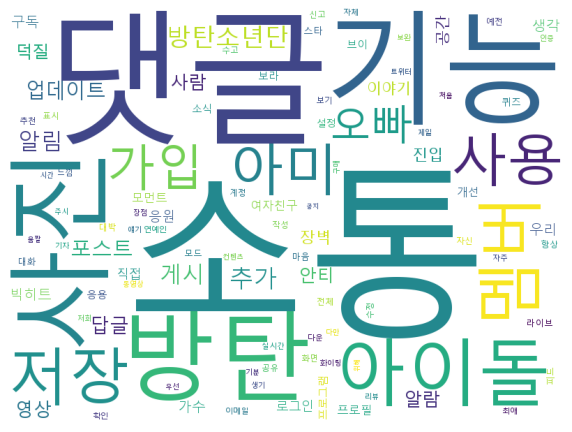

In [54]:
# 워드클라우드-위버스-긍정
wc = WordCloud(font_path="/content/drive/MyDrive/font/MALGUN.TTF", background_color='white',width=800, height=600)
gen = wc.generate_from_frequencies(dict(weverse_positive))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(gen)
plt.show()

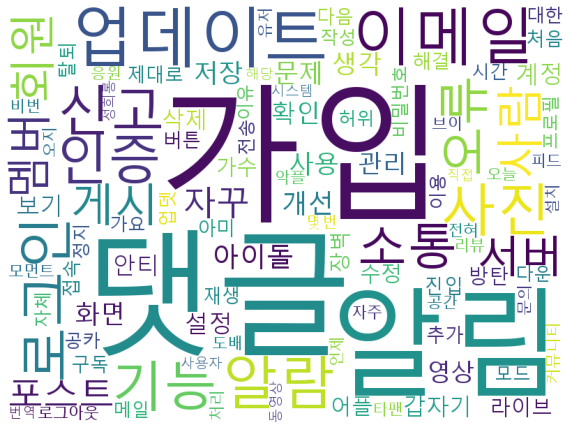

In [55]:
# 워드클라우드-위버스-부정
wc = WordCloud(font_path="/content/drive/MyDrive/font/MALGUN.TTF", background_color='white',width=800, height=600)
gen = wc.generate_from_frequencies(dict(weverse_negative))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(gen)
plt.show()

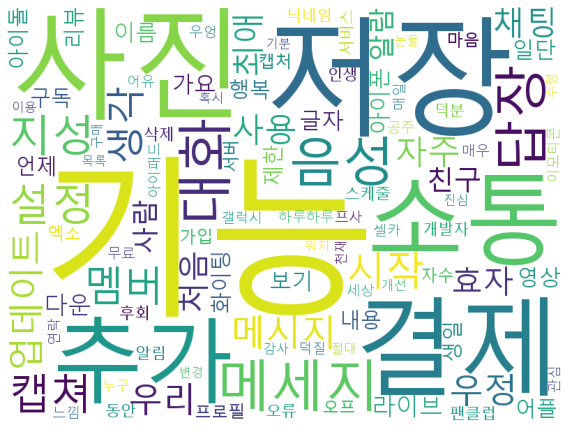

In [56]:
# 워드클라우드-버블-긍정
wc = WordCloud(font_path="/content/drive/MyDrive/font/MALGUN.TTF", background_color='white',width=800, height=600)
gen = wc.generate_from_frequencies(dict(bubble_positive))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(gen)
plt.show()

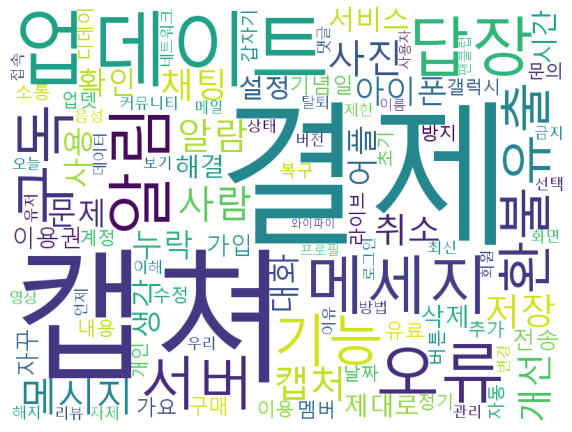

In [57]:
# 워드클라우드-버블-부정
wc = WordCloud(font_path="/content/drive/MyDrive/font/MALGUN.TTF", background_color='white',width=800, height=600)
gen = wc.generate_from_frequencies(dict(bubble_negative))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(gen)
plt.show()

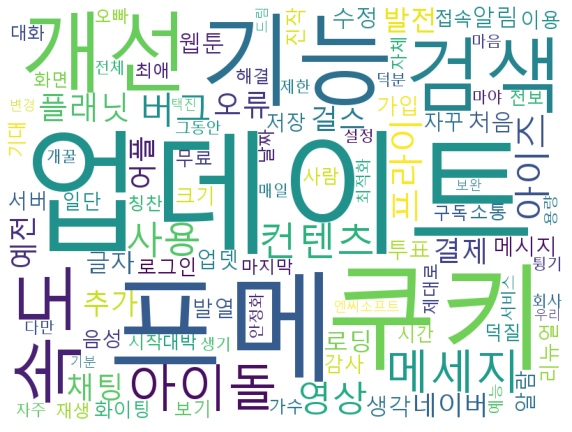

In [58]:
# 워드클라우드-유니버스-긍정
wc = WordCloud(font_path="/content/drive/MyDrive/font/MALGUN.TTF", background_color='white',width=800, height=600)
gen = wc.generate_from_frequencies(dict(universe_positive))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(gen)
plt.show()

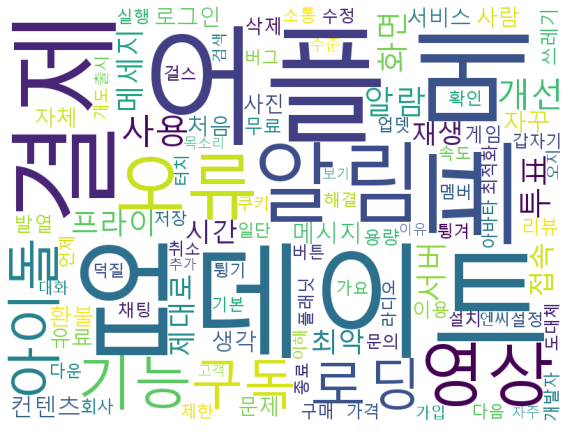

In [59]:
# 워드클라우드-유니버스-부정
wc = WordCloud(font_path="/content/drive/MyDrive/font/MALGUN.TTF", background_color='white',width=800, height=600)
gen = wc.generate_from_frequencies(dict(universe_negative))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(gen)
plt.show()

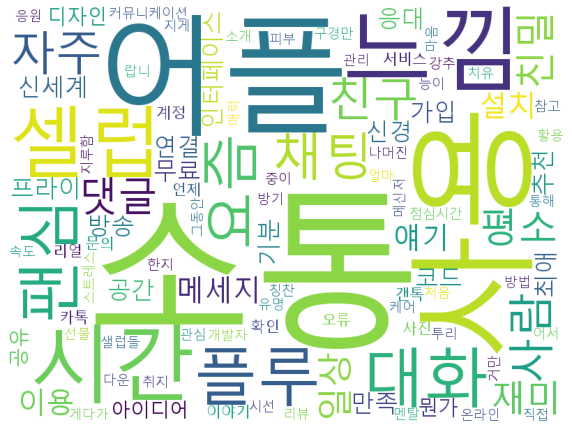

In [60]:
# 워드클라우드-팬심-긍정
wc = WordCloud(font_path="/content/drive/MyDrive/font/MALGUN.TTF", background_color='white',width=800, height=600)
gen = wc.generate_from_frequencies(dict(fancim_positive))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(gen)
plt.show()

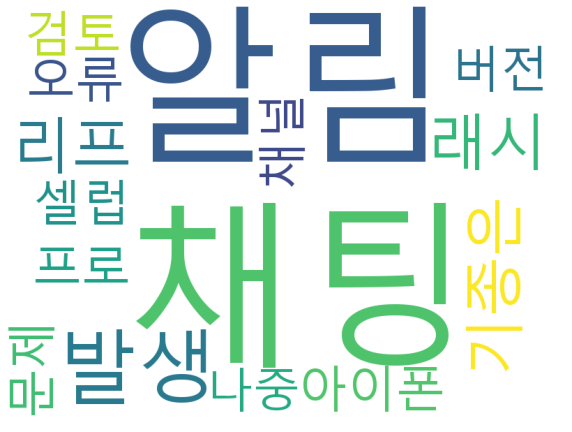

In [61]:
# 워드클라우드-팬심-부정
wc = WordCloud(font_path="/content/drive/MyDrive/font/MALGUN.TTF", background_color='white',width=800, height=600)
gen = wc.generate_from_frequencies(dict(fancim_negative))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(gen)
plt.show()

In [62]:
print(T_weverse.shape)
print(T_weverse['labels_sh_threshold'].value_counts())
print(T_weverse['labels_sh_threshold'].value_counts(normalize=True).round(2)*100)
print(T_bubble.shape)
print(T_bubble['labels_sh_threshold'].value_counts())
print(T_bubble['labels_sh_threshold'].value_counts(normalize=True).round(2)*100)
print(T_universe.shape)
print(T_universe['labels_sh_threshold'].value_counts())
print(T_universe['labels_sh_threshold'].value_counts(normalize=True).round(2)*100)
print(fancim.shape)
print(fancim['labels_sh_threshold'].value_counts())
print(fancim['labels_sh_threshold'].value_counts(normalize=True).round(2)*100)

(4547, 6)
negative    3334
positive    1213
Name: labels_sh_threshold, dtype: int64
negative    73.0
positive    27.0
Name: labels_sh_threshold, dtype: float64
(3565, 6)
negative    3106
positive     459
Name: labels_sh_threshold, dtype: int64
negative    87.0
positive    13.0
Name: labels_sh_threshold, dtype: float64
(5008, 6)
negative    4480
positive     528
Name: labels_sh_threshold, dtype: int64
negative    89.0
positive    11.0
Name: labels_sh_threshold, dtype: float64
(42, 6)
positive    38
negative     4
Name: labels_sh_threshold, dtype: int64
positive    90.0
negative    10.0
Name: labels_sh_threshold, dtype: float64
